In [1]:

import pandas
df = pandas.read_csv( "mnist.csv")

In [2]:
df.shape


(70000, 786)

In [ ]:
df.dtypes

In [3]:
df.label.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: label, dtype: int64

In [5]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28,train
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
69996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
69997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
69998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False


In [6]:
df[ '14x14' ].describe()

count    70000.000000
mean        96.881671
std        108.768569
min          0.000000
25%          0.000000
50%         29.000000
75%        232.000000
max        255.000000
Name: 14x14, dtype: float64

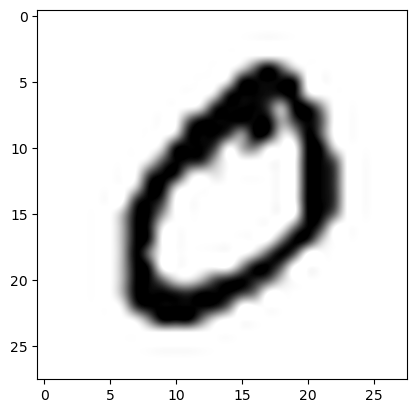

In [4]:
import numpy
import matplotlib.pyplot
bitArray = df.iloc[ 1, 1:-1].values
bitMatrix = numpy.reshape( bitArray.astype(int), (28,28) )
img=matplotlib.pyplot.imshow( bitMatrix, cmap='gray_r', interpolation='spline36' )

In [8]:
def displayPixels( data, nRow ):
    bitArray = data.iloc[ nRow, 1:-1].values
    bitMatrix = numpy.reshape( bitArray.astype(int), (28,28) )
    matplotlib.pyplot.clf()
    matplotlib.pyplot.imshow( bitMatrix, cmap='gray_r', interpolation='none' )
    matplotlib.pyplot.title( "row = " + str(nRow) + "; label=" + str( data.label[ nRow ]) )
    matplotlib.pyplot.minorticks_on()
    matplotlib.pyplot.grid( which = "both")
    matplotlib.pyplot.show()

In [3]:
get_ipython().ast_node_interactivity = 'all'

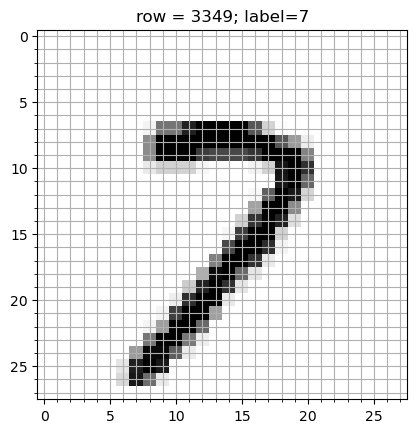

In [9]:
displayPixels( df, 3349 )

In [12]:
y_train = df.label[ df.train ]
y_test = df.label[ ~df.train ]
X_train = df.loc[ df.train, ~df.columns.isin(['label', 'train']) ]
X_test = df.loc[ ~df.train, ~df.columns.isin(['label', 'train']) ]

In [ ]:
df[ '1x1' ].describe()
df[ '28x28' ].describe()

In [13]:
arrayMax = X_train.max().values


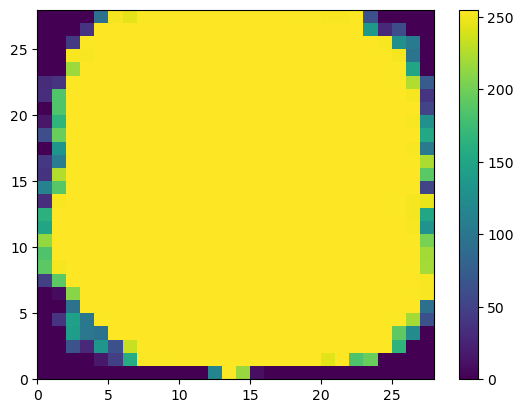

In [14]:
matrixMax = numpy.reshape( arrayMax, (28,28) )
heat = matplotlib.pyplot.pcolormesh( matrixMax )
matplotlib.pyplot.colorbar(heat)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
pipeLogistic1 = Pipeline( [
    ('variance', VarianceThreshold() ),
    ('model', LogisticRegression() )
    ])


In [16]:
pipeLogistic1.fit( X_train, y_train )

C:\Users\Ahern\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('variance', VarianceThreshold()),
                ('model', LogisticRegression())])

In [17]:
predTrainLogistic1 = pipeLogistic1.predict( X_train )
predTestLogistic1 = pipeLogistic1.predict( X_test )

In [18]:
import sklearn.metrics
sklearn.metrics.accuracy_score( y_test, predTestLogistic1)
print( sklearn.metrics.classification_report( y_test, predTestLogistic1 ) )

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.89      0.88       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



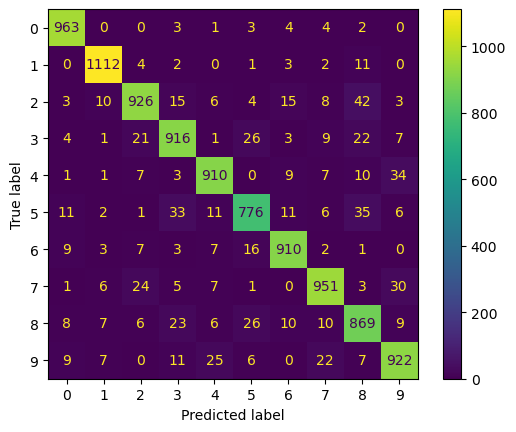

In [19]:
cm = sklearn.metrics.ConfusionMatrixDisplay.from_predictions( y_test, predTestLogistic1 )

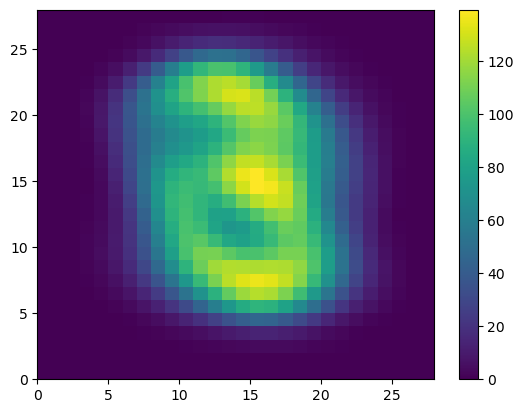

In [20]:
arrayAvg = X_train.mean().values
matrixAvg = numpy.reshape( arrayAvg, (28,28) )
heat = matplotlib.pyplot.pcolormesh( matrixAvg )
matplotlib.pyplot.colorbar(heat)

In [ ]:
hist = pandas.DataFrame( X_train.var() ).hist(bins=100 )

In [21]:
from sklearn.svm import SVC
pipeSvc = Pipeline( [
    ('variance', VarianceThreshold( threshold=20 ) ),
    ('model', SVC() )
    ])

In [22]:
pipeSvc.fit( X_train, y_train )

Pipeline(steps=[('variance', VarianceThreshold(threshold=20)),
                ('model', SVC())])

In [25]:
predTrainSvc = pipeSvc.predict( X_train )
predTestSvc = pipeSvc.predict( X_test )

In [24]:
sklearn.metrics.accuracy_score( y_test, predTestSvc)
print( sklearn.metrics.classification_report( y_test, predTestLogistic2 ) )

NameError: name 'predTestLogistic2' is not defined

In [8]:
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline
pipeSvc = Pipeline( [
    ('variance', VarianceThreshold( threshold=20 ) ),
    ('model', SVC() )
    ])

In [9]:
pipeSvc.fit( X_train, y_train )

Pipeline(steps=[('variance', VarianceThreshold(threshold=20)),
                ('model', SVC())])

In [ ]:
#predTrainSvc = pipeSvc.predict( X_train )
predTestSvc = pipeSvc.predict( X_test )

In [10]:
from sklearn.neural_network import MLPClassifier
pipeNn = Pipeline( [
    ('variance', VarianceThreshold( threshold=20 ) ),
    ('model', MLPClassifier( hidden_layer_sizes=(28,28), max_iter=1000 ) )
    ])

In [11]:
pipeNn.fit( X_train, y_train )

Pipeline(steps=[('variance', VarianceThreshold(threshold=20)),
                ('model',
                 MLPClassifier(hidden_layer_sizes=(28, 28), max_iter=1000))])

In [15]:
#predTrainNn = pipeNn.predict( X_train )
predTestNn = pipeNn.predict( X_test )


NameError: name 'sklearn' is not defined

In [17]:
import sklearn.metrics
sklearn.metrics.accuracy_score( y_test, predTestNn )

0.9465

In [19]:
X_test[ predTestNn != y_test ].index

Int64Index([60008, 60018, 60033, 60038, 60061, 60076, 60092, 60149, 60151,
            60175,
            ...
            69858, 69881, 69888, 69892, 69916, 69941, 69944, 69975, 69980,
            69982],
           dtype='int64', length=535)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

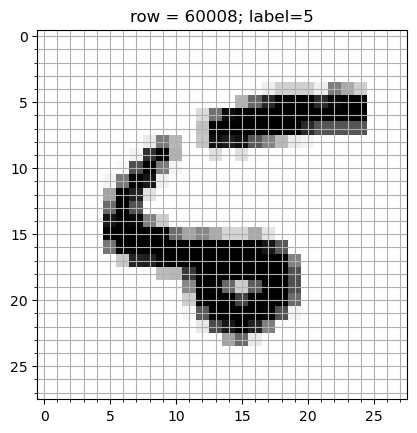

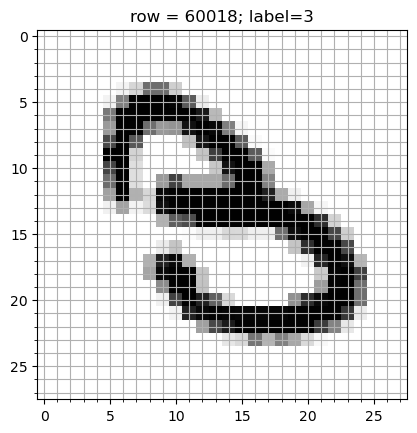

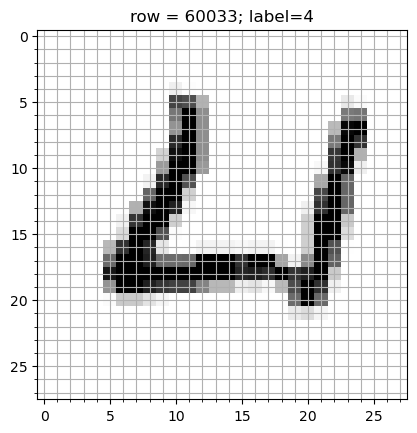

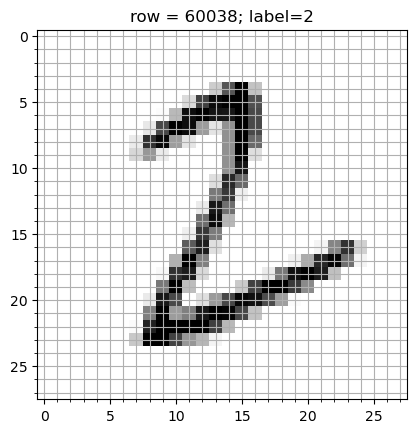

In [22]:
displayPixels( df, 60008 )
displayPixels( df, 60018 )
displayPixels( df, 60033 )
displayPixels( df, 60038 )

In [ ]:
########### SECOND CLASS ##############

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pipeLda = Pipeline([
    ('model', LinearDiscriminantAnalysis( n_components=3 ) )
    ])
dfLda = pipeLda.fit_transform( X_train, y_train )

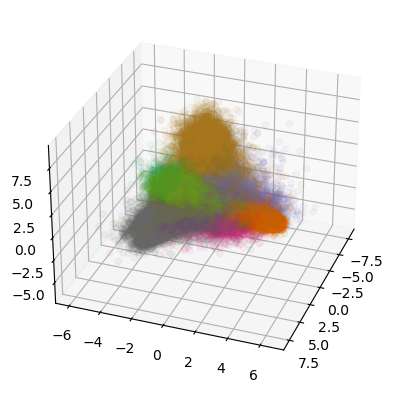

In [37]:
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot( projection='3d')
ax.view_init(30, 20)
scatter=ax.scatter( dfLda[:,0], dfLda[:,1], dfLda[:,2], c=matplotlib.pyplot.cm.Dark2( y_train ), alpha=.05 )

In [ ]:
############ NEW CLASS

In [6]:
lstText = [ "I hate cleaning up after that stupid cat.",
    "Yikes. It's raining cats and dogs.",
    "Taking care of felines is tough.",
    "Cats are generally clean animals.",
    "Cats are not generally clean animals." ]



In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer( analyzer='word' )
mTokens = vectorizer.fit_transform(lstText)

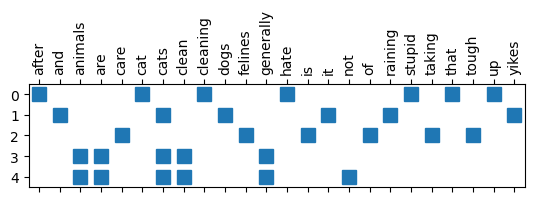

In [8]:
import matplotlib.pyplot
spyplot = matplotlib.pyplot.spy( mTokens )
ax = matplotlib.pyplot.xticks( ticks=range(0, mTokens.shape[1]), labels=vectorizer.
get_feature_names_out(), rotation='vertical')

In [10]:
vectorizer = CountVectorizer(analyzer='char' )
mTokens = vectorizer.fit_transform(lstText)

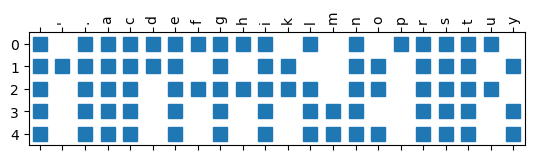

In [11]:
spyplot = matplotlib.pyplot.spy( mTokens )
ax = matplotlib.pyplot.xticks( ticks=range(0, mTokens.shape[1]), labels=vectorizer.
get_feature_names_out(), rotation='vertical')

In [12]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(2, 2))
mTokens = vectorizer.fit_transform(lstText)

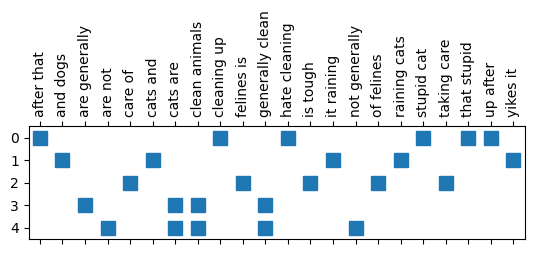

In [13]:
spyplot = matplotlib.pyplot.spy( mTokens )
ax = matplotlib.pyplot.xticks( ticks=range(0, mTokens.shape[1]), labels=vectorizer.
get_feature_names_out(), rotation='vertical')

In [14]:
vectorizer = CountVectorizer( analyzer='word', stop_words='english' )
mTokens = vectorizer.fit_transform(lstText)

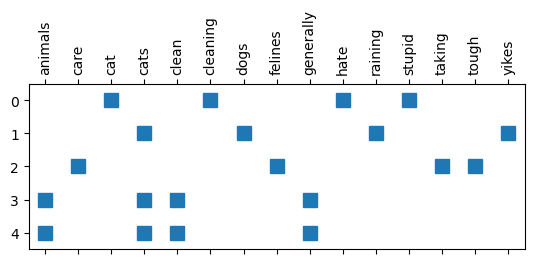

In [15]:
spyplot = matplotlib.pyplot.spy( mTokens )
ax = matplotlib.pyplot.xticks( ticks=range(0, mTokens.shape[1]), labels=vectorizer.
get_feature_names_out(), rotation='vertical')

In [23]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahern\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahern\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk import word_tokenize
class PorterTokenizer:
    def __init__(self):
        self.portstem = PorterStemmer()
    def __call__(self, doc):
        return [self.portstem.stem(t) for t in word_tokenize(doc)]

In [24]:
vectorizer = CountVectorizer(tokenizer=PorterTokenizer())
mTokens = vectorizer.fit_transform(lstText)

In [25]:
vectorizer = CountVectorizer(tokenizer=PorterTokenizer())
mTokens = vectorizer.fit_transform(lstText)

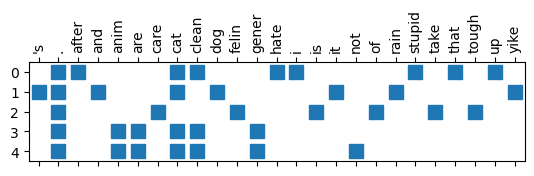

In [26]:
spyplot = matplotlib.pyplot.spy( mTokens )
ax = matplotlib.pyplot.xticks( ticks=range(0, mTokens.shape[1]), labels=vectorizer.
get_feature_names_out(), rotation='vertical')

In [27]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [28]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ahern\AppData\Roaming\nltk_data...


True

In [30]:
sia = SentimentIntensityAnalyzer()
for t in lstText:
    print( t )
    sia.polarity_scores( t )

I hate cleaning up after that stupid cat.


{'neg': 0.587, 'neu': 0.413, 'pos': 0.0, 'compound': -0.7964}

Yikes. It's raining cats and dogs.


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Taking care of felines is tough.


{'neg': 0.172, 'neu': 0.46, 'pos': 0.368, 'compound': 0.4019}

Cats are generally clean animals.


{'neg': 0.0, 'neu': 0.597, 'pos': 0.403, 'compound': 0.4019}

Cats are not generally clean animals.


{'neg': 0.311, 'neu': 0.689, 'pos': 0.0, 'compound': -0.3089}

NameError: name 'sia' is not defined